In [1]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
N = 10
path = './txt_files/'
Files = ['data_{:0>2}.txt'.format(i+1) for i in range(N)]
Sample = ['ABC-{}'.format(50+i) for i in range(N)]
Files, Sample

(['data_01.txt',
  'data_02.txt',
  'data_03.txt',
  'data_04.txt',
  'data_05.txt',
  'data_06.txt',
  'data_07.txt',
  'data_08.txt',
  'data_09.txt',
  'data_10.txt'],
 ['ABC-50',
  'ABC-51',
  'ABC-52',
  'ABC-53',
  'ABC-54',
  'ABC-55',
  'ABC-56',
  'ABC-57',
  'ABC-58',
  'ABC-59'])

['1.0,41.1,27.0,5.201\n2.0,43.7,26.9,5.151\n3.0,50.4,27.6,5.677\n4.0,24.8,27.0,4.907\n5.0,31.3,25.9,5.142\n',
 '1.0,40.3,22.9,2.931\n2.0,46.8,24.2,5.146\n3.0,24.4,29.0,5.446\n4.0,34.3,29.2,4.012\n5.0,37.6,25.9,2.709\n6.0,55.1,24.5,6.329\n',
 '1.0,41.1,34.5,3.887\n2.0,36.2,38.2,4.344\n3.0,41.1,22.3,3.859\n4.0,43.5,32.2,4.131\n5.0,22.7,18.3,3.991\n',
 '1.0,36.4,31.5,3.554\n2.0,33.3,27.1,2.974\n3.0,36.4,30.2,3.157\n4.0,31.9,32.3,4.133\n5.0,22.7,30.4,3.316\n6.0,41.8,33.6,3.748\n7.0,36.0,26.1,5.19\n8.0,23.7,31.3,4.407\n',
 '1.0,36.0,42.1,5.196\n2.0,48.6,22.1,8.377\n3.0,37.7,37.2,5.334\n4.0,48.1,44.6,9.76\n5.0,42.9,38.5,6.413\n6.0,34.6,19.0,5.939\n7.0,59.1,32.5,9.731\n8.0,35.2,43.4,9.102\n',
 '1.0,53.0,34.9,4.99\n2.0,49.2,34.4,5.036\n3.0,38.4,35.8,4.757\n4.0,30.4,32.7,4.957\n5.0,20.1,33.3,5.303\n6.0,40.9,27.0,4.692\n7.0,41.1,34.9,4.944\n8.0,34.1,35.3,4.133\n',
 '1.0,35.9,28.8,4.494\n2.0,50.6,26.9,4.065\n3.0,39.0,28.0,4.664\n4.0,41.4,29.5,4.69\n5.0,45.8,26.1,4.102\n6.0,53.5,28.7,4.969\n',
 '1

<AxesSubplot:>

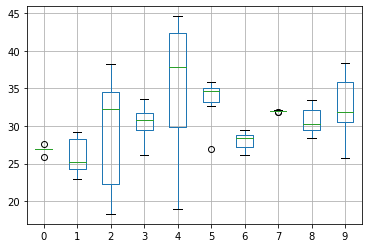

In [3]:
fig, ax = plt.subplots()
np.random.seed(0)
Data = []
B = []
for i in range(N):
    n = np.random.randint(5, 9)
    mean = np.random.randint(22, 29)+i
    std = abs(np.random.randn())*(mean//6)
    n_list = list(range(1,n+1))
    a = list((np.random.randn(n)*10 + 40).round(1))
    b = list((np.random.normal(mean, std, n)).round(1))
    c = list((np.random.normal(np.random.randint(4, 8), abs(np.random.randn(1)), n)).round(3))
    A = np.array([n_list, a, b, c]).T
    B.append(b)

    data = ''
    for a in A:
        a = list(a)
        data += ','.join(map(str, a))
        data += '\n'
    Data.append(data)
display(Data)

df = pd.DataFrame(B).T
display(df.boxplot(ax = ax))
print()

In [4]:
for i in range(N):
    file = Files[i]
    sample = Sample[i]
    with open(path+file, 'w') as f:
        f.write('''\
FILE NAME,{file_name}
DATE,YYYYMMDD
SAMPLE NAME,{sample_name}
TEST_DATA
N,Length(cm),Time(s),Weight(g)
{data}
'''.format(file_name=file, sample_name=sample, data=Data[i])
        )